# Interactive analysis

This notebook is used only for checking the properties of one simulation.

In [1]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # Ignore some messages from pandas
import pandas as pd

sys.path.insert(0, '../icenumerics/')
import icenumerics as ice

ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Auxiliary functions

def plot_colloid(rawtrj):

    f, ax = plt.subplots(figsize=(5, 5));

    trj_particle = rawtrj[rawtrj.type==1]
    trj_trap = rawtrj[rawtrj.type==2]

    frame = 0
    xparticle = np.array(trj_particle.loc[idx[frame,:],"x"])
    yparticle = np.array(trj_particle.loc[idx[frame,:],"y"])
    ax.plot(xparticle,yparticle,'o', color='y')

    xtrap = np.array(trj_trap.loc[idx[frame,:],"x"])
    ytrap = np.array(trj_trap.loc[idx[frame,:],"y"])
    ax.plot(xtrap,ytrap,'o', color='g')

    ax.axis("square");
    return f,ax

def classify_vertices(vrt):
    vrt["type"] = np.NaN

    vrt.loc[vrt.eval("coordination==4 & charge == -4"),"type"] = 1
    vrt.loc[vrt.eval("coordination==4 & charge == -2"),"type"] = 2
    vrt.loc[vrt.eval("coordination==4 & charge == 0 & (dx**2+dy**2)==0"),"type"] = 3
    vrt.loc[vrt.eval("coordination==4 & charge == 0 & (dx**2+dy**2)>0"),"type"] = 4 # Dipolo
    vrt.loc[vrt.eval("coordination==4 & charge == 2"),"type"] = 5
    vrt.loc[vrt.eval("coordination==4 & charge == 4"),"type"] = 6
    return vrt

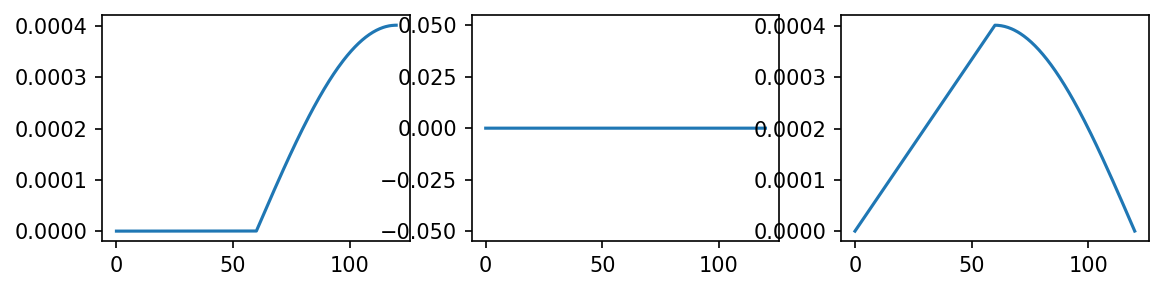

In [3]:
# Some parameters from the file
totalTime = 120*ureg.s
framespersec = 100*ureg.Hz
dt = 10*ureg.ms

# Importing files
trj_raw = trj = pd.read_csv("../data/trj.csv", index_col=[0,1])
ctrj_raw = pd.read_csv("../data/ctrj.csv", index_col=[0,1])

fig, ax = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax[0].plot(np.array(trj_raw.loc[idx[:,1],"t"]),np.array(trj_raw.loc[idx[:,1],"mux"]))
ax[1].plot(np.array(trj_raw.loc[idx[:,1],"t"]),np.array(trj_raw.loc[idx[:,1],"muy"]))
ax[2].plot(np.array(trj_raw.loc[idx[:,1],"t"]),np.array(trj_raw.loc[idx[:,1],"muz"]))


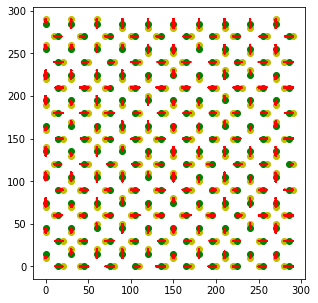

In [4]:
# Plotting the trajectories just to see everything is OK
f,ax = plot_colloid(trj_raw);
for i, trj_i in trj_raw.groupby("id"):
    if all(trj_i.type==1):
        ax.plot(np.array(trj_i.x),np.array(trj_i.y), color = "r")

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

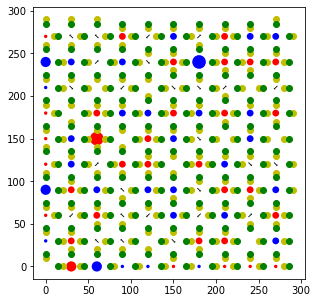

In [5]:
# Plotting the vertices charges
v = ice.vertices()

frame = 2399
v = v.trj_to_vertices(ctrj_raw.loc[frame])

f,ax = plot_colloid(trj_raw)
v.display(ax)

In [10]:
# OPTIONAL. RUN IF YOU DONT HAVE THE VERTICES  YET

v = ice.vertices()
frames = ctrj_raw.index.get_level_values("frame").unique()

#v.trj_to_vertices(ctrj_raw.loc[frames[::100]])
v.trj_to_vertices(ctrj_raw.loc[frames[::50]])
v.vertices.to_csv('../data/vertices.csv')

  0%|          | 0/240 [00:00<?, ?it/s]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning

Text(0, 0.5, 'fraction of vertices')

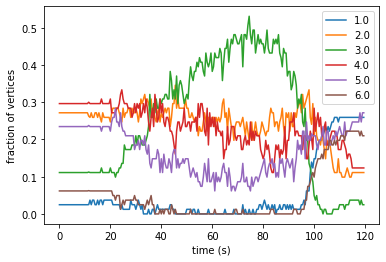

In [11]:
# OPTIONAL. RUN IF YOU HAVE THE VERTICES FILE
vertices = pd.read_csv("../data/vertices.csv", index_col=[0,1])
vertices = classify_vertices(vertices)
vertices = vertices.dropna()

count = ice.count_vertices(vertices)
for vertexType,v_t in count.groupby("type"):
    plotTime = np.array(v_t.index.get_level_values('frame')) / framespersec
    vertexFraction = np.array(v_t.fraction)
    plt.plot(plotTime, vertexFraction, label = vertexType)
plt.legend()
plt.xlabel('time (s)')
plt.ylabel('fraction of vertices')

In [16]:
ctrj_raw

type      x      y    z            dx    dy   dz       t        cx  \
frame id                                                                        
0     0       2   15.0    0.0  0.0 -1.000000e+01  -0.0 -0.0    0.00 -5.000000   
      1       2   45.0    0.0  0.0 -1.000000e+01  -0.0 -0.0    0.00 -5.000000   
      2       2   75.0    0.0  0.0 -1.000000e+01  -0.0 -0.0    0.00 -5.000000   
      3       2  105.0    0.0  0.0  1.000000e+01   0.0  0.0    0.00  5.000000   
      4       2  135.0    0.0  0.0 -1.000000e+01  -0.0 -0.0    0.00 -5.000000   
...         ...    ...    ...  ...           ...   ...  ...     ...       ...   
11999 195     2  150.0  285.0  0.0 -6.123230e-16 -10.0 -0.0  119.99 -0.001999   
      196     2  180.0  285.0  0.0 -6.123230e-16 -10.0 -0.0  119.99 -0.085007   
      197     2  210.0  285.0  0.0 -6.123230e-16 -10.0 -0.0  119.99 -0.054001   
      198     2  240.0  285.0  0.0 -6.123230e-16 -10.0 -0.0  119.99  0.003006   
      199     2  270.0  285.0  0.0 -6.123230e-16 -10.0 -0.0  119.99 -0.152008   

                 cy   cz  
frame id                  
0     0    0.000000  0.0  
      1    0.000000  0.0  
      2    0.000000  0.0  
      3    0.000000  0.0  
      4    0.000000  0.0  
...             ...  ...  
11999 195 -4.988007  0.0  
      196 -5.033997  0.0  
      197 -4.946991  0.0  
      198 -5.287994  0.0  
      199 -5.153015  0.0  

[2400000 rows x 11 columns]

  0%|          | 0/99 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

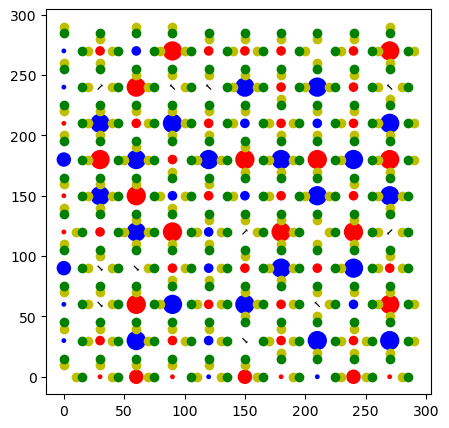

In [17]:
# Plotting the vertices charges
v = ice.vertices()

frame = 11999
v = v.trj_to_vertices(ctrj_raw.loc[frame])

f,ax = plot_colloid(trj_raw)
v.display(ax)